<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_22_Distribuci%C3%B3n_normal_estandarizada_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución norma estándar Z



# Objetivo

Tranformar valores de una variable continua $x$ a valores de $z$ para calcular probabilidades en función de una distribución normal estándar $z$



# Descripción

- Cargar librerías
- Cargar funciones
- Fórmula de z
- Transfoamr valores de $x$ a $z$
- Calcular probabilidades




# Fundamento teórico

La distribución normal estándar o distribución normal tipificada es una distribución normal singular cuya denominación es media igual a cero y desviación estándar igual a 1. μ=0; σ=1.

Se necesita una variable, $z$ que representa el producto de una transformación o cambio de variable continua $x$ que sigue una distribución normal del tipo $N(μ = 0, σ = 1$.

Esta transformación se llama tipificación (también estandarización o normalización):

¿Porqué $z$?, en general, el valor de $z$
se interpreta como el número de desviaciones estándar que están comprendidas entre el promedio y un cierto valor de variable $x$.

Se identifica $z$ como la diferencia entre un valor de la variable y el promedio, expresada esta diferencia en cantidad de desviaciones estándar.[mendenhall2006?)].

Entonces, a partir de cualquier variable aleatoria $x$ que siga una distribución normal, se puede obtener otra característica $z$ con una distribución normal estándar, sin más que efectuar la transformación conforme y de acuerdo a la fórmula.

Visualmente, la densidad de una variable aleatoria de $z$ es igual a la densidad de una variable aleatoria $x$, es decir el comportamiento de la curva es una gráfica de gauss o campana. Los valores de ambas densidades varían porque la media de una estándar es $\mu=0$ y la desviación es $\sigma = 1$.


## ¿Para qué se utiliza la distribucion normal estándar z?

Se utiliza para estandarizar variables aleatorias normales, convirtiéndolas en puntuaciones $z$.

La estandarización es útil en estadística y análisis de datos por varias razones:

- Comparación de diferentes escalas: cuando se estás¿ trabajando con diferentes conjuntos de datos que pueden tener unidades o escalas diferentes, la estandarización permite comparar las observaciones en una escala común.

- Identificación de valores atípicos (*outliers* o extremos): Al convertir los datos en puntuaciones $z$, se puede identificar fácilmente valores atípicos. Los valores $z$ que están muy lejos de cero (por ejemplo, mayores que 3 o meno+res que -3) pueden indicar observaciones inusuales.

- Cálculos de Probabilidades: Al igual que si fuera una distribución  normal, solo que en lugar de $x$ es $z$: La distribución normal estándar (también conocida como tabla $z$) se utiliza para calcular probabilidades asociadas con puntuaciones $z$. Esto es útil en inferencia estadística y pruebas de hipótesis.

- Normalización de Datos: Al estandarizar variables que implica normalizar los datos, generalmente simplifica los cálculos y facilita la interpretación de los resultados. [https://chat.openai.com]

## Regla empírica

- Aproximadamente $68$% de las observaciones caerán entre más y menos una desviación estándar de la media.
- Aproximadamente $95$% de las observaciones caerán entre más y menos dos desviaciones estándar de la media.
- Prácticamente todas, o $99.7$% de las observaciones caerán entre más y menos tres desviaciones estándar de la media.[@lind2015].

## Fórmula para calcular $z$

$$
z = \frac{x - \mu}{\sigma}
$$

$$
x \text{ es el valor de una variable aleatoria continua de una distribución  normal} \\
\sigma \text{ desviación estándar de población} \\
\mu \text{ media de la población}
$$

## Ejemplo. Tranformar un valor de $x$ a $z$

Tranformar una variable aletoria que proviene de una distribución de media igual a $\mu = 20$ y desviación estándar de $5$.
- El valor de $x$ es 6; ¿cuál es el valor de z?
- El valor de $x$ es 25; ¿cuál es el valor de z?


$$
z = \frac{x - \mu}{\sigma} = z = \frac{6 - 20}{5} = z = \frac{-14}{5} = -2.8
$$

Significa que el valor de $x=6$ corresponde a una tranformación de $z = -2.8$.

$$
z = \frac{x - \mu}{\sigma} = z = \frac{25 - 20}{5} = z = \frac{5}{5} = 1
$$

Significa que el valor de $x=25$ corresponde a una tranformación de $z = 1$.


# Desarrollo



## Cargar librerías

Se van a cargar las librerias similares al caso anterior.



In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

## Cargar funciones

Se van a utilizar funciones similares al caso 21 agregando la función para tranformar $x$ a $z$.




In [3]:
# Densidad normal
def f_x_normal(x, media, desv_std):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores, titulo):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la crear una densidad
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std **2))

    # Visualizar la PDF
    plt.plot(x, pdf, label=titulo + '(media:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    plt.title('Función de Densidad - Distribución ' + titulo)
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad ')
    plt.legend(loc='upper right')

    # plt.show()

def f_visualizar_dens_area_normal(valores, a, b, prob=0, v_color = 'red', titulo='normal'):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne estándar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))

    # La probabilidad
    prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)
    # Visualizar la PDF
    plt.plot(x, pdf, label=titulo+':(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área ['+str(np.round(a)) + " a "+str(np.round(b))+"]="+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Probabilidad (PDF) - '+titulo)
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad ')
    plt.legend(loc='upper right')
    # plt.grid(True)
    #plt.show()

def f_visualizar_frecuencia(frecuencia):
  # Crear gráfico de barras
  plt.bar(frecuencia.index, frecuencia)

  # Agregar etiquetas y título
  plt.xlabel('Variable')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia en los Datos')

  # Mostrar el gráfico
  plt.show()

def f_visualizar_VE_desv_std_normal(valores):
  # Se calcula la media de los valores
  VE = media = np.mean(valores)

  # Se calcula la desviacióne st´dnar de los valores
  desv_std = np.std(valores)

  # Crear un rango de valores para la PDF
  x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

  # Calcular la PDF de la distribución normal
  pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))

  # Agregar una línea punteada
  plt.axvline(x=VE, color='red', linestyle='--', label='VE='+str(np.round(VE, 2)))
  plt.axvline(x=VE - desv_std, color='blue', linestyle='--', label='Desv. Std='+str(np.round(desv_std, 2)))
  plt.axvline(x=VE + desv_std, color='blue', linestyle='--')

  # La probadilidad de VE ± desv_std
  a = VE - desv_std
  b = VE + desv_std
  prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)

  plt.fill_between(x, 0, pdf, where=(x >= VE - desv_std) & (x <= VE + desv_std), alpha=0.3, color='red', label='Área '+str(np.round(VE - desv_std, 2)) + "-"+str(np.round(VE + desv_std, 2))+ "="+str(np.round(prob, 2)))


  plt.title('VE y desviación estándar de los datos. Distribución Normal')
  plt.xlabel('Valor de x')
  plt.ylabel('Densidad de Probabilidad')
  plt.legend(loc='upper right')
  # plt.grid(True)
  plt.show()

# Se reciben valores de x y se devuelven valores en z
def f_transformar_x_z(x, media, desv_std):
  x = (x - media) / desv_std
  return x


## Transformar valores de x a z

Se utiliza la función *f_transformar_x_z()*



In [ ]:
media = 20
desv_std = 5
x = 6
z = f_transformar_x_z(x, media, desv_std)
print ("El valor de x = ",x,"transformado a z es: ",np.round(z, 4))



El valor de x =  6 transformado a z es:  -2.8


In [ ]:
media = 20
desv_std = 5
x = 25
z = f_transformar_x_z(x, media, desv_std)
print ("El valor de x = ",x,"transformado a z es: ",np.round(z, 4))


El valor de x =  25 transformado a z es:  1.0


## Generando números aleatorios. Simulando calificaciones

Se generan los similares números aleatorios del caso anterior emulando calificaciones de estudiantes.

### Semilla

In [ ]:
np.random.seed(2024)

Se generan cien números aleatorios con media de $80$ y desviación estándar de $5$; $\mu=80$; $\sigma=5$ .

In [ ]:
media = 80
desv_std = 5
num_aleatorios = norm.rvs(loc = media, scale = desv_std, size = 100)
print(np.round(num_aleatorios, 4))

media = np.mean(num_aleatorios)
desv_std = np.std(num_aleatorios)
print("Los estadísticos a partir de los datos den ser similares a 80 y 5 respectivamente")
print ("La media de los datos = ", np.round(media, 2))
print ("La desviación estándar de los datos = ", np.round(desv_std, 2))


[84.2993 75.9797 76.8955 86.7673 82.0345 77.6843 78.0839 83.5762 78.3902
 84.752  85.4503 80.7322 79.2823 69.7835 78.0509 72.6709 71.1366 76.6751
 90.3532 73.839  83.5139 75.5954 73.8605 80.4144 76.4785 82.0357 79.8887
 71.8844 80.7013 76.2745 80.8924 82.6034 78.5048 91.302  75.018  84.8139
 81.5916 75.0671 81.5361 74.0427 70.2559 78.0908 79.512  86.6555 78.78
 78.5187 78.9789 78.5382 74.8865 76.2791 81.5698 78.9695 79.6734 77.4159
 90.7204 86.7537 85.7495 76.067  74.5965 73.1319 78.5632 84.5901 87.5228
 78.8496 82.8045 75.195  81.2854 84.7918 79.8288 85.7566 79.5184 84.0149
 82.1307 79.9446 89.4916 67.5017 79.5598 73.3642 83.4306 83.0591 77.9921
 75.6576 77.3388 79.8438 74.0445 82.503  62.0677 84.4968 80.8172 84.1649
 78.1963 77.7937 68.6311 79.1665 83.0082 82.387  76.2939 75.6536 64.9363
 81.22  ]
Los estadísticos a partir de los datos den ser similares a 80 y 5 respectivamente
La media de los datos =  79.25
La desviación estándar de los datos =  5.26


### Transformar estos números aleatorios a valores z

Con la media y la desviación etándar calculados; con los datos de los números aleatorios generados, se transforma a valores en $z$ usando la función *f_transformar_x_z*.

In [ ]:
# Transformar
zs = f_transformar_x_z(num_aleatorios, media, desv_std)
print ("Valores de z")
print (zs)

Valores de z
[ 0.96064586 -0.62223548 -0.44800712  1.43021053  0.52975976 -0.29792612
 -0.22189931  0.82307689 -0.16361851  1.04677855  1.17964281  0.28196555
  0.0061216  -1.8011407  -0.22816453 -1.25177156 -1.54368632 -0.4899286
  2.11247624 -1.02952434  0.8112182  -0.69536452 -1.02544345  0.22151625
 -0.52733585  0.52997907  0.12149049 -1.40141596  0.27609037 -0.56615643
  0.31244998  0.63798838 -0.14180678  2.29298766 -0.80521365  1.05855374
  0.44549248 -0.79587367  0.43492573 -0.99077763 -1.71126511 -0.22058551
  0.04980972  1.40894773 -0.08945517 -0.13916591 -0.05161717 -0.13545617
 -0.83023504 -0.56526802  0.4413433  -0.05338876  0.0805358  -0.34898967
  2.18233253  1.42762588  1.23658077 -0.60562509 -0.88540645 -1.16406027
 -0.13070898  1.01598322  1.57396837 -0.07620728  0.67626032 -0.7715434
  0.38722591  1.05436685  0.11009459  1.23791859  0.05103165  0.90653749
  0.54806424  0.13212548  1.9485396  -2.23527338  0.05891114 -1.11986223
  0.79536992  0.72469622 -0.23935639 -0.

### Densidad con respecto de z

Se manda llamar la función que visualiza la densidad *f_visualizar_dens_normal()* tanto de los números aleatorios como la densidad de los valores de transformados en $z$.

Las gráficas son similars, solo varía el valor de la densidad de cada gráfica dado que la media y la deviación estándar de una normal estandarizada es $\mu=0$ y $\sigma=1$.

El siguiente código visualiza las dos densidades en un mimso renglón, mandando llamar la función.


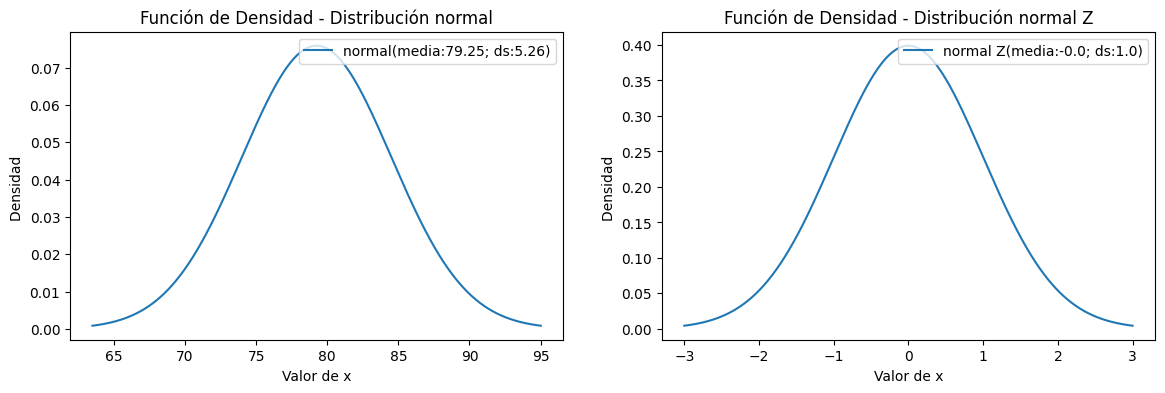

In [ ]:
# Crear una figura con dos subgráficos en una fila
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)  # Primer subgráfico
f_visualizar_dens_normal(num_aleatorios, "normal")
plt.subplot(1, 2, 2)  # Segundo subgráfico
f_visualizar_dens_normal(zs, "normal Z")
plt.show()



### Probabilidad con respecto de z

Calcular probabilidades en distribución  normal estándarizada $z$ es semejante a calcular probabilidades en distribución normal.

#### Probabilidad de que x sea menor que 75

$F(x \le 75)$

Con los mismos datos iniciales de $\mu\approx80$ y $\sigma ≈ 5$ y los datos aleatorios además de los datos de $z$, se convierte $x$ de 75 a $z$ y se calculan probabilidades.

Se visualizan ambas probabilidades tanto con distribución normal como con distribución $z$; debe de obtenerse la misma probabilidad en ambas distribuciones:




In [ ]:
x1 = z1 = -np.Inf
x2 = 75
z2 = f_transformar_x_z(x2, media, desv_std)
print ("El valor de x2 = ",x2,"transformado a z es: ",np.round(z2, 4))


El valor de x2 =  75 transformado a z es:  -0.8086


Ahora calcular la probabilidad f(x ≤75 ) con la función previamente codificada que visualiza el área sombreada bajo la curva representando la probabilidad en ambas gráficas, tanto en distribución normal como en distribución normal estandarizada de $z$.

La probabilidad entre  -inf  y  75  es 0.2094 aproximadamente  20.9361 %


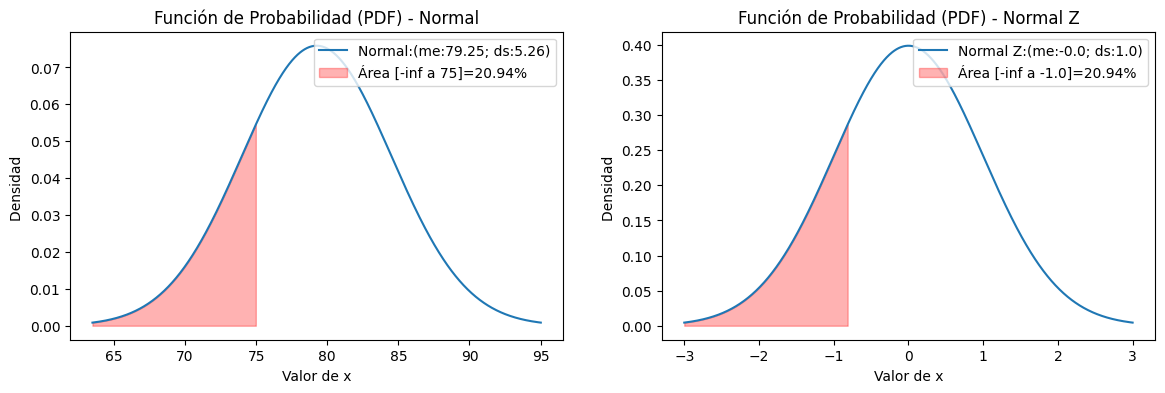

In [ ]:
# Ahora calcular la probabilidad f(x ≤75 )
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 4), "%")

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)  # Primer subgráfico
f_visualizar_dens_area_normal(num_aleatorios, x1, x2, titulo = 'Normal')
plt.subplot(1, 2, 2)  # Segundo subgráfico
f_visualizar_dens_area_normal(zs, z1, z2, titulo = 'Normal Z')

plt.show()

### Ejercicio estaturas pesos y generos de personas

Se carga un archivo con extensión csv que contiene medidas de personas. Las variables de interés son estatura en centímetros, peso en kilogramos y género que puede ser Hombre o Mujer.

#### Cargar datos y análisis descriptivo

Se cargan datos y se presenta un análisis descriptivo de la cantidad de registros ,los estadísticos básicos de las variables estatura y peso así como la frecuencia por género.

Son  n=507  registros de los cuales hay  260  mujeres y  247  hombres.

La media aritmética de la variable estatura es  171.14  con desviación estándar de  9.40 ; la media de la variable peso es  69.14  con desviación estándar de  13.34

     estatura  peso genero_cat
0       174.0  65.6     Hombre
1       175.3  71.8     Hombre
2       193.5  80.7     Hombre
3       186.5  72.6     Hombre
4       187.2  78.8     Hombre
..        ...   ...        ...
502     176.5  71.8      Mujer
503     164.4  55.5      Mujer
504     160.7  48.6      Mujer
505     174.0  66.4      Mujer
506     163.8  67.3      Mujer

[507 rows x 3 columns]
         estatura        peso
count  507.000000  507.000000
mean   171.143787   69.147535
std      9.407205   13.345762
min    147.200000   42.000000
25%    163.800000   58.400000
50%    170.300000   68.200000
75%    177.800000   78.850000
max    198.100000  116.400000
genero_cat
Mujer     260
Hombre    247
Name: count, dtype: int64


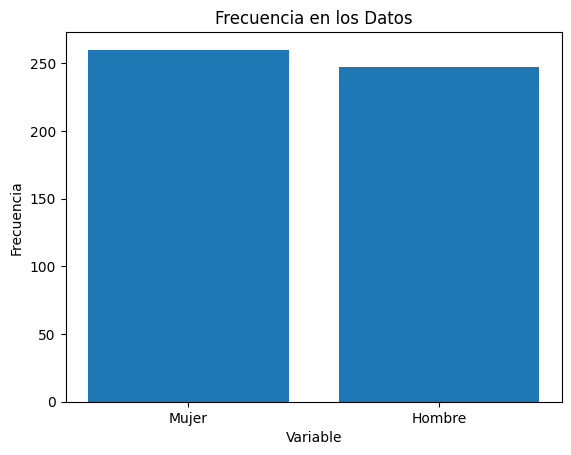

In [ ]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2023/datos/estatura%20peso%20generos.csv")
print(datos[['estatura', 'peso', 'genero_cat']])

print(datos[['estatura', 'peso']].describe())
# Determinar la frecuencia de cada atributo en la columna 'genero'
frecuencia_genero = datos['genero_cat'].value_counts()

# Imprimir la frecuencia
print(frecuencia_genero)

f_visualizar_frecuencia(frecuencia_genero)

#### Calcular la media y desviación estándar de estaura de hombres

A partir de los datos, se calcula la media aritmética y la desviación estándar de la estatura del conjunto de datos hombres.

In [ ]:
# Filtrar datos para obtener solo los hombres
 #datos_hombres = datos[datos['genero'] == 'Hombre']
datos_hombres = datos.query("genero_cat == 'Hombre'")
#print(datos_hombres['estatura'])
# Media estatura de hombres
media_est_hombres = np.mean(datos_hombres['estatura'])
desv_std_est_hombres = np.std(datos_hombres['estatura'])
print ("La media de estatura hombres", np.round(media_est_hombres, 4))
print ("La desviación estándar de estatura hombres", np.round(desv_std_est_hombres, 4))

La media de estatura hombres 177.7453
La desviación estándar de estatura hombres 7.1691


#### Transformar los datos a valores z



In [ ]:
# Transformar
zs = f_transformar_x_z(datos_hombres['estatura'], media_est_hombres, desv_std_est_hombres)
print ("Valores de z")
print (zs)

Valores de z
0     -0.522431
1     -0.341096
2      2.197586
3      1.221170
4      1.318812
         ...   
242    0.188958
243    1.779122
244    0.007624
245    0.356344
246    0.356344
Name: estatura, Length: 247, dtype: float64


### Probabilidades con datos del género hombres

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura mayor que 180 centímetros?

$F(180 \le x \le \infty)$ o bien, $1 - F(x \le 180)$

Con los estadístico de media y desviación estándar y los valores, visualizar la densidad y el área de hombre con estatura mayor que $180$.

De igual forma se debe transformar a valor $z$ el valor de $x=180$ para calcular también la p,robabilidad con distribución normal estandarizada $z$.


In [ ]:
x1 = z1 = 180
x2 = z2 = np.Inf
z1 = f_transformar_x_z(x1, media_est_hombres, desv_std_est_hombres)
print ("El valor de x1 = ",x1,"transformado a z es: ",np.round(z1, 4))


El valor de x1 =  180 transformado a z es:  0.3145


Ahora calcular la probabilidad f(x >180 ) con la función previamente codificada que visualiza el área sombreada bajo la curva representando la probabilidad en ambas gráficas, tanto en distribución normal como en distribución normal estandarizada de  z .

La probabilidad entre  180  y  inf  es 0.3766 aproximadamente  37.6572 %


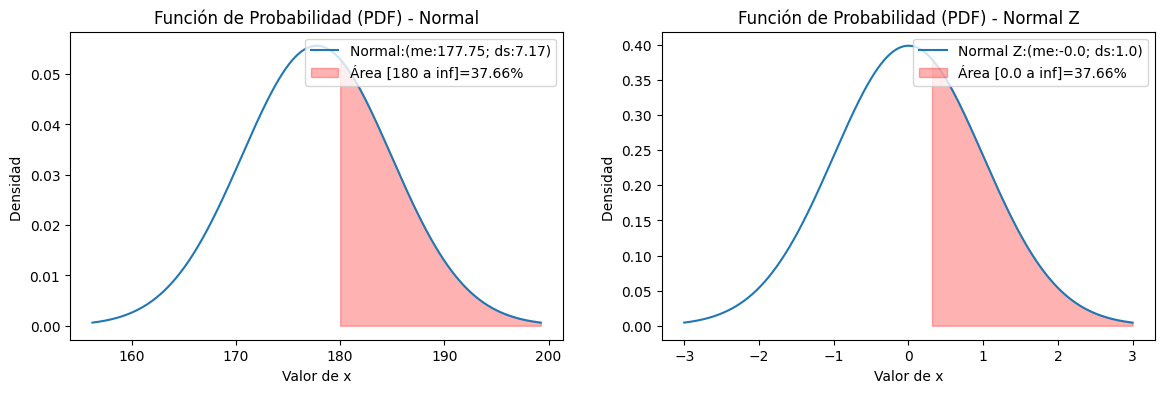

In [ ]:
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres) - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)

# Puede calcularse restanso la probabilidad de 180 a la unidad
# probabilidad = 1 - norm.cdf(x1, media_est_hombres, desv_std_est_hombres) # y es el mismo valor
# Ahora calcular la probabilidad f(x > 180  )
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 4), "%")

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)  # Primer subgráfico
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, titulo = 'Normal')
plt.subplot(1, 2, 2)  # Segundo subgráfico
f_visualizar_dens_area_normal(zs, z1, z2, titulo = 'Normal Z')

plt.show()

### Tiempo de duranción de focos

Una empresa de material eléctrico fabrica focos de luz que tienen una duración, antes de quemarse (fundirse), que se distribuye normalmente con media igual a  μ=800  horas y una desviación estándar de  σ=40  horas. Ejercicio extraído de [@walpole_probabilidad_2012].

Encuentre las siguientes probabilidades tranforamndo valores de $x$ a $z$:

- ¿cuál es la probabilidad de que un foco se queme entre 778 y 834 horas?;  F(778≤x≤834) .
- ¿cuál es la probabilidad de que un foco se funda a más de 850 horas?;  1−F(x≤850)


### Calificaciones de alumnos visto en clase presencial

La media de calificaciones de alumnos de prbabilidad y estadística es de $\mu=85.5$ con una desviación estándar de $\sigma=4.9$.

* Generar 30 números aleatorios, que representan las calificaciones de alumnos.
* Transformar valores de $x = 90$ y $x = 92$ a valores estandarizados z.
* Visualizar curva de densidad de ambas distribuciones esátandar y estándar normalizada o Z.
* Calcular la probabilidad de que los alumnos tengan calificación entre $90$ y $92$. Tanto por la distribución normal y normal estándar z.
* Visualizar probabilidades


#### Generar 30 números aleatorios, que representan las calificaciones de alumnos.

In [12]:
media = 85.5
desv_std = 4.9
calificaciones = norm.rvs(loc = media, scale = desv_std, size = 30)
print(np.round(calificaciones, 2))

media = np.mean(calificaciones)
desv_std = np.std(calificaciones)
print()
print("Los estadísticos a partir de los datos deben ser similares a 85.5 y 4.9 respectivamente")
print ("La media de los datos = ", np.round(media, 2))
print ("La desviación estándar de los datos = ", np.round(desv_std, 2))


[89.89 91.98 86.69 93.67 82.72 94.16 83.36 90.77 91.26 78.16 86.27 80.11
 83.49 81.35 89.43 80.48 86.19 85.97 90.51 91.16 76.42 90.   80.27 84.86
 88.65 89.36 89.72 86.52 86.17 75.64]

Los estadísticos a partir de los datos deben ser similares a 85.5 y 4.9 respectivamente
La media de los datos =  86.17
La desviación estándar de los datos =  4.96


#### Transformar valores de  x=90  y  x=92  a valores estandarizados z.

In [13]:
# Lista con calificaciones xs iniciales a transformar
xs = [90, 92]
zs = f_transformar_x_z(xs, media, desv_std)
print ("Valores de x: ", xs, "; valores de z", zs, " respectivamete.")


Valores de x:  [90, 92] ; valores de z [0.77066193 1.17360194]  respectivamete.


####  Visualizar curva de densidad de ambas distribuciones esátandar y estándar normalizada o Z.

Las curvas de densidad es con las calificaciones generdas aletoiamente , puede variar la media y la desviación estándar pero similar a $\mu=85.5$ y $\sigma=4.9$


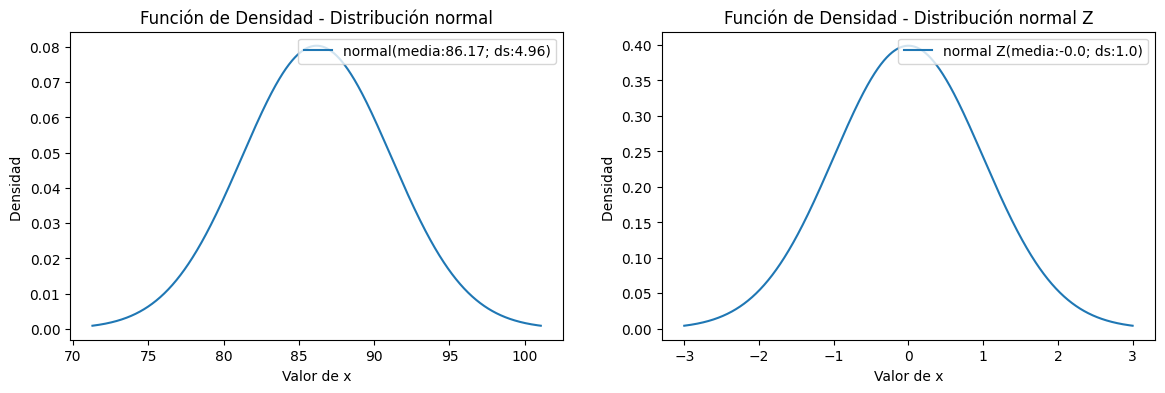

In [14]:
# Crear una figura con dos subgráficos en una fila
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)  # Primer subgráfico
f_visualizar_dens_normal(calificaciones, "normal")
plt.subplot(1, 2, 2)  # Segundo subgráfico
f_visualizar_dens_normal(f_transformar_x_z(calificaciones, media, desv_std), "normal Z")
plt.show()

#### Calcular la probabilidad de que los alumnos tengan calificación entre  90  y  92 . Tanto por la distribución normal y normal estándar z.

$$
f(90 \le x \le 92)
$$

Las probabilidades se calcuan con los datos aleatoios que tienen una media de $\mu=86.17$ y $\sigma=4.96$ similar a los estadísticos iniciales.

La probabilidad entre  90  y  92  es 0.1002 aproximadamente  10.0176 %


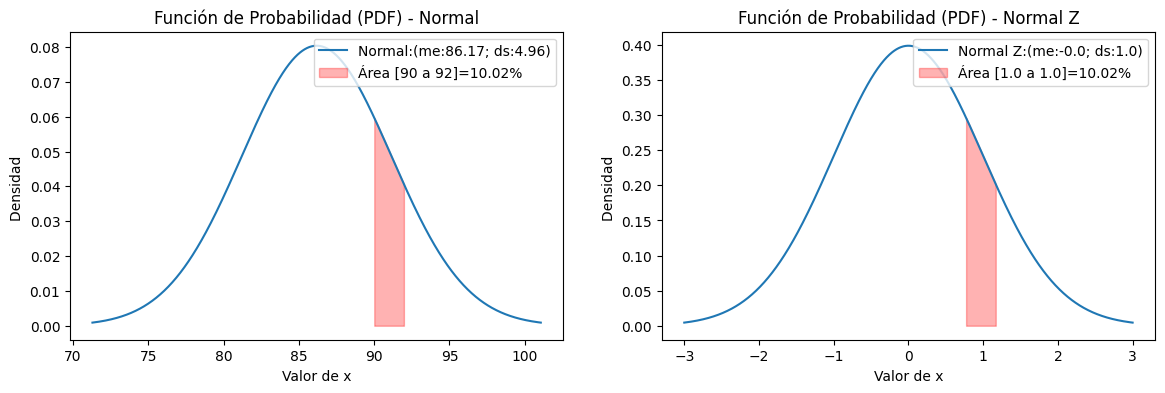

In [18]:
x1 = 90
x2 = 92
z1 = f_transformar_x_z(x1, media, desv_std)
z2 = f_transformar_x_z(x2, media, desv_std)
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)

# Puede calcularse restanso la probabilidad de 180 a la unidad
# probabilidad = 1 - norm.cdf(x1, media_est_hombres, desv_std_est_hombres) # y es el mismo valor
# Ahora calcular la probabilidad f(x > 180  )
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 4), "%")

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)  # Primer subgráfico
f_visualizar_dens_area_normal(calificaciones, x1, x2, titulo = 'Normal')
plt.subplot(1, 2, 2)  # Segundo subgráfico
f_visualizar_dens_area_normal(f_transformar_x_z(calificaciones, media, desv_std), z1, z2, titulo = 'Normal Z')

plt.show()




# Interpretación

- ¿qué significa transformar variables aleatorias $x$ a variables $z$?.
- ¿qué características tiene una distribución normal estándar $z$?.
- ¿para qué se utiliza la distribución normal estándar $z$?.

Con el ejericio de calificaciones de estudiantes
- ¿Cuál es la probabilidad de encontrar estudiantes con calificación por debajo o igual a 75?
- ¿Cuál es la probabilidad de encontrar estudiantes con calificación entre 80 y 90?
- ¿Cuál es la probabilidad de encontrar estudiantes con calificación por encima de 95?

Con el ejercicio de estatura hombres
- ¿Cuál es el valor de $z$ a un valor de estatura $x=180$
- ¿Cuál es la probabilidad de elegir hombres que tengan estatura por encima del $180$ centímetros?


Con repecto al peso en kilogramos de los hombres
- ¿Cuál es la probabilidad de encontrar hombres con un peso coporal superior a  80  kilogramos;  1−F(x≤80)
- ¿Cual es la probabilidad de encontrar hombres con un peso corporal entre  70  y  75  kilogramos?;  F(70≤x≤75)
- ¿Cuál es la probabilidad de encontrar hombres que pesen menos de  65  kilogramos?;  F(x≤65)

Con repecto al peso en kilogramos de las mujeres
- ¿Cuál es la probabilidad de encontrar mujeres con un peso coporal superior a  80  kilogramos;  1−F(x≤80)
- ¿Cual es la probabilidad de encontrar mujeres con un peso corporal entre  70  y  75  kilogramos?;  F(70≤x≤75)
- ¿Cuál es la probabilidad de encontrar mujeres que pesen menos de  65  kilogramos?;  F(x≤65)

- ¿Resultan las mismas probabilidades en ditribución normal que en distribución normal estándar $z$?, ¿porqué?

# Bibliografía

- Anderson, David R., Dennis J. Sweeney, and Thomas A. Williams. 2008. Estadística Para Administración y Economía. 10th ed. Australia • Brasil • Corea • España • Estados Unidos • Japón • México • Reino Unido • Singapur: Cengage Learning,.
- Lind, Douglas, William Marchal, and Samuel Wathen. 2015. Estadística Aplicada a Los Negocios y La Economía. Decimo Sexta. México, D.F.: McGraw-Hill.
- Mendenhall, William, Robert J. Beaver, and Barbara M. Beaver. 2006. Introducción a La Probabilidad y Estadística. 13a Edición.
- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.

- https://chat.openai.com